### Import libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

### Laod dataset into a DataFrame

In [2]:
# read dataset
dataset = pd.read_csv('../dataset/iris/iris.data', names=['SepalLength', 'SepalWidth', 'PetalLength',  'PetalWidth', 'class'])

### Data exploration

In [3]:
# print some examples
dataset[::50]

,SepalLength,SepalWidth,PetalLength,PetalWidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


In [4]:
# print calss names
print('Dataset classes:')
class_names = dataset['class'].unique()
print(class_names)

Dataset classes:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


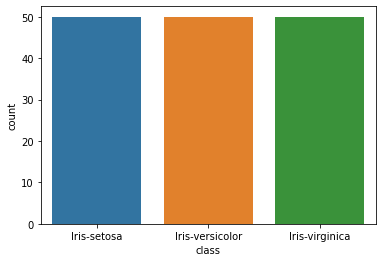

In [5]:
barplot_data = dataset.groupby('class', as_index=False).count()[['class', 'SepalLength']]
barplot_data.columns = ['class', 'count']
sns.barplot(data=barplot_data, x='class', y='count')
plt.show()

In [6]:
# data describtion
dataset.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# some informations about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


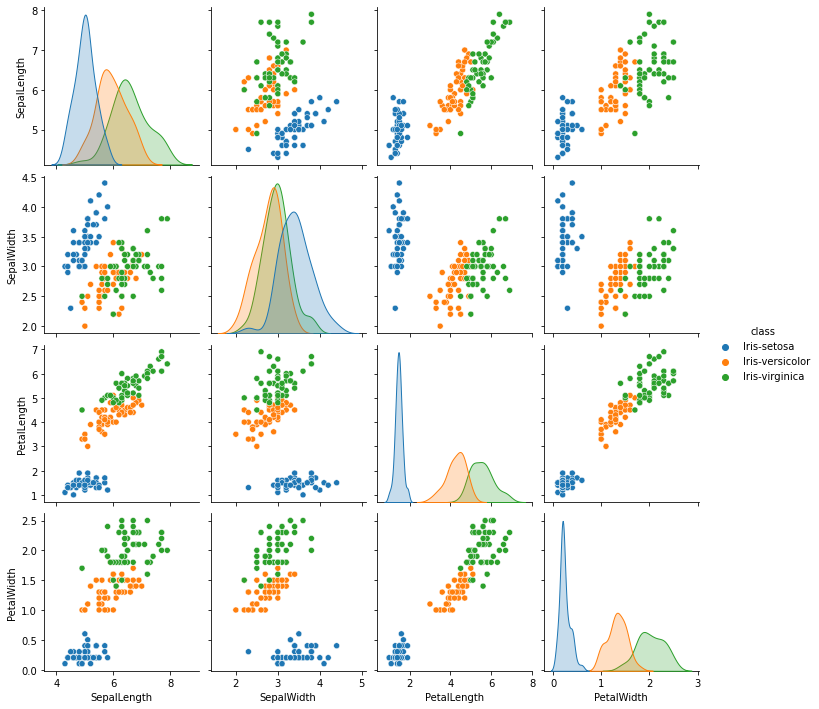

In [8]:
sns.pairplot(dataset, hue='class')
plt.show()

### Data preparation

In [9]:
# change  name of classes to categorical class with numbers
dataset.loc[dataset['class'] == 'Iris-setosa','class'] = 0
dataset.loc[dataset['class'] == 'Iris-versicolor','class'] = 1
dataset.loc[dataset['class'] == 'Iris-virginica','class'] = 2

# print some examples
dataset[::30]

,SepalLength,SepalWidth,PetalLength,PetalWidth,class
0,5.1,3.5,1.4,0.2,0
30,4.8,3.1,1.6,0.2,0
60,5.0,2.0,3.5,1.0,1
90,5.5,2.6,4.4,1.2,1
120,6.9,3.2,5.7,2.3,2


In [10]:
# Converting data to numpy array in order for processing
X = dataset.iloc[:, 0:4]
y = dataset.iloc[:, 4]

# print X and y shapes
print("Shape of X",X.shape)
print("Shape of y",y.shape)

Shape of X (150, 4)
Shape of y (150,)


In [11]:
# print examples
print('Examples of X:')
print(X[::50], end='\n\n')

print('Examples of y:')
print(y[::50])

Examples of X:
     SepalLength  SepalWidth  PetalLength  PetalWidth
0            5.1         3.5          1.4         0.2
50           7.0         3.2          4.7         1.4
100          6.3         3.3          6.0         2.5

Examples of y:
0      0
50     1
100    2
Name: class, dtype: object


In [12]:
# Creating trainset, testset and validation data
total_length = len(dataset)
train, test = train_test_split(dataset, test_size=0.2, shuffle=True, random_state=1)

X_train = train.iloc[:,0:4]
X_test = test.iloc[:,0:4]
y_train = train.iloc[:,4]
y_test = test.iloc[:,4]

# print tainset and testset shape
print("Shape of train set => X:", X_train.shape, "y:", y_train.shape)
print("Shape of test set => X:", X_test.shape, "y:", y_test.shape)

Shape of train set => X: (120, 4) y: (120,)
Shape of test set => X: (30, 4) y: (30,)


In [13]:
# Neural network module
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from keras.utils import np_utils

### Interpretable Model

#### 1. RuleFit

In [14]:
from rulefit import RuleFit

In [15]:
# id of the instance that we will predict her class and explain it
id_instance = 20

# print features value
features = X_test.iloc[id_instance]
print('Features value: ')
print(features, end='\n\n')

Features value: 
SepalLength    5.5
SepalWidth     2.6
PetalLength    4.4
PetalWidth     1.2
Name: 90, dtype: float64



In [16]:
rf = RuleFit()
rf.fit(X_train.values, y_train, feature_names=X_train.columns)
print('Accuracy: ', np.mean(np.round(rf.predict(X_test.values)) == y_test))

Accuracy:  0.9666666666666667


In [17]:
print('Real class:', class_names[y_test.iloc[id_instance]])
print('Predicted class:', class_names[int(np.round(rf.predict(X_test.values))[id_instance])])

Real class: Iris-versicolor
Predicted class: Iris-versicolor


In [18]:
rules = rf.get_rules()

rules = rules[rules.coef != 0].sort_values(['support', 'importance'], ascending=False)

rules.head(10)

,rule,type,coef,support,importance
879,PetalLength <= 4.950000047683716,rule,-0.003762,0.683333,0.001750
44,PetalWidth <= 1.6500000357627869 & SepalWidth ...,rule,-0.008077,0.650000,0.003852
34,PetalWidth <= 1.6500000357627869 & PetalWidth ...,rule,-0.753445,0.616667,0.366324
602,PetalWidth <= 1.6500000357627869 & PetalLength...,rule,-0.014415,0.616667,0.007008
40,PetalWidth <= 1.699999988079071 & PetalLength ...,rule,-0.022510,0.600000,0.011028
58,PetalWidth > 1.050000011920929,rule,0.000302,0.583333,0.000149
348,PetalWidth <= 1.699999988079071 & PetalLength ...,rule,-0.000139,0.583333,0.000069
621,PetalLength > 2.599999964237213 & SepalWidth <...,rule,0.000049,0.533333,0.000025
510,SepalWidth <= 3.049999952316284 & PetalWidth >...,rule,0.000700,0.500000,0.000350
337,SepalWidth > 2.950000047683716 & PetalLength <...,rule,-0.000069,0.466667,0.000035


In [20]:
PetalLength, PetalWidth, SepalLength, SepalWidth = features['PetalLength'], features['PetalWidth'], features['SepalLength'], features['SepalWidth']

print('Some rules to explain the prediction, each rules is characterised by its support and importance')
for i, row in rules.iterrows():
    if eval(row.rule.replace('&', 'and')):
        print(f'Support: {row.support:.3}','\t', f'Importance: {row.importance:.3}', '\t', f'{row.rule}')

Some rules to explain the prediction
Support: 0.683 	 Importance: 0.00175 	 PetalLength <= 4.950000047683716
Support: 0.65 	 Importance: 0.00385 	 PetalWidth <= 1.6500000357627869 & SepalWidth > 2.25 & SepalLength <= 7.099999904632568
Support: 0.617 	 Importance: 0.366 	 PetalWidth <= 1.6500000357627869 & PetalWidth <= 1.550000011920929 & PetalLength <= 4.950000047683716
Support: 0.617 	 Importance: 0.00701 	 PetalWidth <= 1.6500000357627869 & PetalLength <= 5.349999904632568
Support: 0.6 	 Importance: 0.011 	 PetalWidth <= 1.699999988079071 & PetalLength <= 4.950000047683716 & PetalLength <= 5.349999904632568
Support: 0.583 	 Importance: 0.000149 	 PetalWidth > 1.050000011920929
Support: 0.583 	 Importance: 6.87e-05 	 PetalWidth <= 1.699999988079071 & PetalLength <= 5.450000047683716 & SepalWidth > 2.25
Support: 0.533 	 Importance: 2.46e-05 	 PetalLength > 2.599999964237213 & SepalWidth <= 3.049999952316284
Support: 0.5 	 Importance: 0.00035 	 SepalWidth <= 3.049999952316284 & PetalWi